# SPAM EMAIL DETECTION

## LOADIND DATA

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv("data/spam.csv", encoding = "latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## PREPROCESSING DATA

In [10]:
data['v1'] = data['v1'].map({
    'ham':0,
    'spam':1
})

In [11]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
data['v2'] = data['v2'].str.lower()
import re 
data['v2'] = data['v2'].apply(
    lambda x: re.sub('[^a-z]',' ', x)
)
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,go until jurong point crazy available only ...,NaN,NaN,NaN
1,0,ok lar joking wif u oni,NaN,NaN,NaN
2,1,free entry in a wkly comp to win fa cup fina...,NaN,NaN,NaN
3,0,u dun say so early hor u c already then say,NaN,NaN,NaN
4,0,nah i don t think he goes to usf he lives aro...,NaN,NaN,NaN


In [13]:
data['v2'] = data['v2'].apply(
    lambda x: ' ' .join(x.split())
)
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,go until jurong point crazy available only in ...,NaN,NaN,NaN
1,0,ok lar joking wif u oni,NaN,NaN,NaN
2,1,free entry in a wkly comp to win fa cup final ...,NaN,NaN,NaN
3,0,u dun say so early hor u c already then say,NaN,NaN,NaN
4,0,nah i don t think he goes to usf he lives arou...,NaN,NaN,NaN


In [14]:
import sys 
!{sys.executable} -m pip install nltk

In [19]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words[:10])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aftab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def remove_stopwords(text):
    words = text.split()
    clean_words = []
    for w in words:
        if w not in stop_words:
            clean_words.append(w)
    return ' '.join(clean_words)
data['v2'] = data['v2'].apply(remove_stopwords)
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,go jurong point crazy available bugis n great ...,NaN,NaN,NaN
1,0,ok lar joking wif u oni,NaN,NaN,NaN
2,1,free entry wkly comp win fa cup final tkts st ...,NaN,NaN,NaN
3,0,u dun say early hor u c already say,NaN,NaN,NaN
4,0,nah think goes usf lives around though,NaN,NaN,NaN


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['v2'])
y = data['v1']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(4457, 7546)
(1115, 7546)


## MODEL TRAINING AND TESTING 

In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


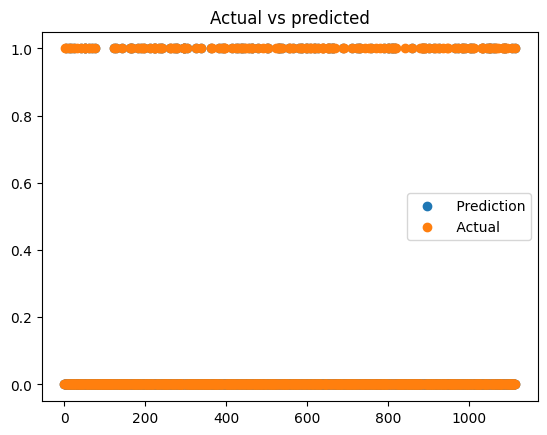

In [36]:
y_pred = model.predict(X_test)
import matplotlib.pyplot as plt 
plt.scatter(range(len(y_pred)), y_pred, label = ' Prediction')
plt.scatter(range(len(y_test)), y_test, label = ' Actual')
plt.legend()
plt.title("Actual vs predicted")
plt.show()

## EVALUATING MODEL PERFORMANCE

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9668161434977578
[[965   0]
 [ 37 113]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



# CONCLUSION
I have used Naive Bayes model for spam email detecion and it has given an accuracy of 97%